<a href="https://colab.research.google.com/github/aquapathos/Demo/blob/master/MNIST%E3%81%AE%E6%89%8B%E6%9B%B8%E3%81%8D%E6%96%87%E5%AD%97%E3%83%87%E3%83%BC%E3%82%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTの手書き文字

MNIST の手書き文字（数字）認識用のデータはAI のプラットフォームの解説やチュートリアルのサンプルとしてよく使われており，たいていのプラットフォームに簡単にMNISTデータを読み込む機能が備わっている．

ここでは，MNISTの手書き文字データを

*   TensorFlow
*   Keras
*   Chainer    

読み込む方法と，読み込んだデータのデータ構造についてまとめておく．

## ライブラリのインポート



In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import keras
import chainer

## MNIST  手書き文字データセットの読み込み

- 詳しくは、https://weblabo.oscasierra.net/python/ai-mnist-data-detail.html

## Tensorflow

```
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/mnist_data/", one_hot=True)
```

## Keras

```
 from keras.datasets import mnist
 (x_train, y_train), (x_test, y_test) = mnist.load_data()
```

## Chainer
```
from chainer import datasets
train, test = datasets.get_mnist(ndim=3)
```

1.   ndim = 1 の場合、(784,)
2.   ndim = 2 の場合、(28,28)
3.   ndim = 3 の場合、(1,28,28)

という構造で読み込まれる。

In [0]:
# tensorflow の場合のデータの読み込み方法
from tensorflow.examples.tutorials.mnist import input_data
mnistTF = input_data.read_data_sets("/tmp/data/", one_hot=True)
# keras の場合のデータの読み込み方法
from keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
# chainer の場合のデータの読み込み方法
from chainer import datasets
trainC, testC = datasets.get_mnist(ndim=3)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# データ構造の確認（TensorFlow）


In [0]:
print(mnistTF.train.images.shape,mnistTF.validation.images.shape,mnistTF.test.images.shape)
print(mnistTF.train.labels.shape,mnistTF.validation.labels.shape,mnistTF.test.labels.shape)

(55000, 784) (5000, 784) (10000, 784)
(55000, 10) (5000, 10) (10000, 10)


訓練用データが 55000，検証用が5000，テスト用が10000 用意されている。

MNISTの手書き文字の画像は 28x28で、バイナリではなく濃淡画像である。images の構造が 784 となっているのは１次元化されているため。

label つまり正解がデータ１つではなく10次元ベクトルであるのは、1 of 10 表現されているため。

In [0]:
mnistTF.train.labels[0] # 0番目のデータのラベル

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

上のラベルは７を表している．このような表現を **1 of K表現** とよぶ．

２進数を使って 1010とすれば容量節約になるわけだが，普通そうはせず，1 of K にしてそのうち１つのみが１となるという制約がかかるように仕組む．

プラットフォームによっては，読み込み時には普通に"７’’というラベルになっていることもある．その場合は，1 of K に変換することになる。

逆に 1 of 10 表現で表現された label から十進の数字を取り出したければ、

```
num = np.argmax(label)
```

とすれば良い。argmax はリストの中の最大値のインデックスを返す関数。（import numpy as np としてあることを仮定）

#### 画像データの確認


In [0]:
def plotchr(image,label,i):
    sns.set_context("talk")   # "talk" はタイトルの文字サイズ。　paper <  notebook <  talk <  poster の順にフォントサイズが大きくなる
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title("%d" % label) # np.argmax は最大値のインデックスを求める関数．１はひとつしかないので，その位置がわかる．
    plt.imshow(image,cmap=plt.cm.gray_r)

テストデータの画像を前から６つ表示してみる．

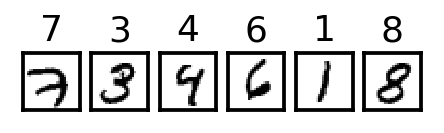

In [0]:
for i in range(6):
    image, label = mnistTF.train.images[i], mnistTF.train.labels[i]
    image = image.reshape((28,28))
    plotchr(image,np.argmax(label),i)

学習の際には問題を次々と取り出さないといけない。そのために、next_batch(個数)という関数も用意されている。

In [0]:
images, labels = mnistTF.train.next_batch(6)
images.shape, labels.shape

((6, 784), (6, 10))

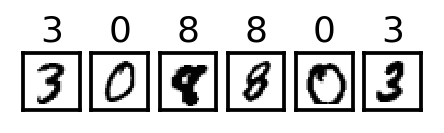

In [0]:
for i in range(6):
    image = images[i].reshape((28,28))
    plotchr(image,np.argmax(labels[i]),i)

# データ構造の確認（Keras）

In [0]:
(Xtrain.shape, ytrain.shape), (Xtest.shape, ytest.shape) 

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

TensorFlow の場合は、訓練事例60000個が学習用55000個と検証用5000に分けられていたが、Keras では両方合わさっている。

ラベルが無次元となっていることから、数字データそのものが使われていることがわかる。

In [0]:
ytrain[:10]  # 先頭から10個表示

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

前述の通り、ニューラルネットワークの正解データは 1 of 10 表現とするのが普通である。keras.utils.to_categorical() で変換できる。

In [0]:
keras.utils.to_categorical(ytrain[:3], 10)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

画像は Keras の場合最初から２次元表現であるので、そのまま表示できる。


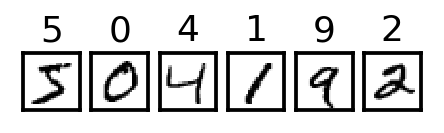

In [0]:
for i in range(6):
    plotchr(Xtrain[i],ytrain[i],i)

# データ構造の確認（Chainer）

TensorFlow と Keras は画像を全て集めたデータとラベルを全部集めたデータに分離してデータが収められていたが、Chainer では画像とラベルの対、つまりタプルのリストいうデータ構造となっている。

In [0]:
trainC, testC = datasets.get_mnist(ndim=3)
print(len(trainC), len(testC), len(trainC[0]),len(testC[0]))

60000 10000 2 2


In [0]:
np.set_printoptions(threshold=3)  # 要素が多い場合、最初と最後の3個のみ表示。
print(trainC[0][0].shape, trainC[0][1])
print(trainC[0][0])

(1, 28, 28) 5
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


ndim=3 で読み込んだので、３次元データ、すなわちテンソルとなっている。１つ目の次元はデータ集合内のデータ番号であり、データ１つだけのデータ集合、というニュアンス。

次に、ndim=2 で読み込んでみる。ほぼ同じに見えるが、３次元テンソルと２次元配列とでかっこが１つ違うことに注意。

In [0]:
trainC, testC = datasets.get_mnist(ndim=2)
print(len(trainC), len(testC), len(trainC[0]),len(testC[0]))
print(trainC[0][0].shape, trainC[0][1])
print(trainC[0][0])

60000 10000 2 2
(28, 28) 5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


ndim=1 の場合。説明は不要であろう。

In [0]:
trainC, testC = datasets.get_mnist(ndim=1)
print(len(trainC), len(testC), len(trainC[0]),len(testC[0]))
print(trainC[0][0].shape, trainC[0][1])
print(trainC[0][0])

60000 10000 2 2
(784,) 5
[0. 0. 0. ... 0. 0. 0.]


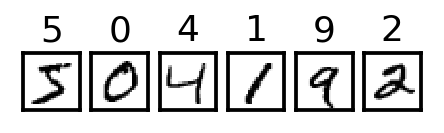

In [0]:
for i in range(6):
    plotchr(trainC[i][0].reshape((28,28)),trainC[i][1],i)